# 1. Data Preprocessing

In [1]:

#Loading Required Libraries
#Import Libraries for Modelling
#Import Libraries for Map
# Import Libraries for HTML output display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import os
import sys
import re
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from pandas import Series, DataFrame
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
sns.set(color_codes=True)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# 1.2 Data Exploration

In [2]:
#loading data set
df = pd.read_csv("chocolate.csv")

In [3]:
# Display dataset top 10 values
df.head(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
5,Salgado,Rio Arriba,292,2008,70%,Argentina,3.50,Forastero (Arriba) ASSS,Ecuador
6,Cacao Store,Madagascar,1684,2015,70%,Japan,3.00,Trinitario,Madagascar
7,Kaoka (Cemoi),Noir,404,2009,70%,France,2.75,,
8,Woodblock,Gran Couva,1042,2013,70%,U.S.A.,3.50,Trinitario,Trinidad
9,Dormouse,"Colombia, Batch 9",1676,2015,80%,U.K.,2.75,"Criollo, Trinitario",Colombia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Company 
(Maker-if known)           1500 non-null object
Specific Bean Origin
or Bar Name    1500 non-null object
REF                                 1500 non-null int64
Review
Date                         1500 non-null int64
Cocoa
Percent                       1500 non-null object
Company
Location                    1500 non-null object
Rating                              1500 non-null float64
Bean
Type                           1499 non-null object
Broad Bean
Origin                   1499 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 105.6+ KB


In [5]:
#checking null values
df.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [6]:
#Checking Duplicate Values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns = ['Company_Makers','Specific_bean_Origin_or_Bar_Name','Ref',
                     'Review_Date','Cocoa_Percent','Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin']

In [9]:
# Descriptive Statics
df.describe()

,Ref,Review_Date,Rating
count,1500.000000,1500.000000,1500.000000
mean,1036.881333,2012.326000,3.183167
std,554.693828,2.933734,0.484319
min,5.000000,2006.000000,1.000000
25%,572.000000,2010.000000,2.750000
50%,1071.000000,2013.000000,3.250000
75%,1503.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [10]:
# Display dataset top  values
df.head(10)

,Company_Makers,Specific_bean_Origin_or_Bar_Name,Ref,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
5,Salgado,Rio Arriba,292,2008,70%,Argentina,3.50,Forastero (Arriba) ASSS,Ecuador
6,Cacao Store,Madagascar,1684,2015,70%,Japan,3.00,Trinitario,Madagascar
7,Kaoka (Cemoi),Noir,404,2009,70%,France,2.75,,
8,Woodblock,Gran Couva,1042,2013,70%,U.S.A.,3.50,Trinitario,Trinidad
9,Dormouse,"Colombia, Batch 9",1676,2015,80%,U.K.,2.75,"Criollo, Trinitario",Colombia


In [11]:
#Display rename columns list
df.columns = df.columns.str.strip()

In [12]:
# Display dataset top 5 values
df.head(5)

,Company_Makers,Specific_bean_Origin_or_Bar_Name,Ref,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [13]:
#checking null value column in bean type and broad bean origin
df[df['Bean_Type'].isnull()]


,Company_Makers,Specific_bean_Origin_or_Bar_Name,Ref,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
177,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [14]:
# Display bean origin null values
df[df['Broad_Bean_Origin'].isnull()]

,Company_Makers,Specific_bean_Origin_or_Bar_Name,Ref,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
750,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


In [17]:
#filling null values
df.fillna(df['Broad_Bean_Origin'].mode()[0], inplace=True) 

In [18]:
# Display null values into dataset after function executation
df.isnull().sum()

Company_Makers                      0
Specific_bean_Origin_or_Bar_Name    0
Ref                                 0
Review_Date                         0
Cocoa_Percent                       0
Company_Location                    0
Rating                              0
Bean_Type                           0
Broad_Bean_Origin                   0
dtype: int64

Text(0.5, 1.0, 'Companies with the Highest Chocolate Vendors')

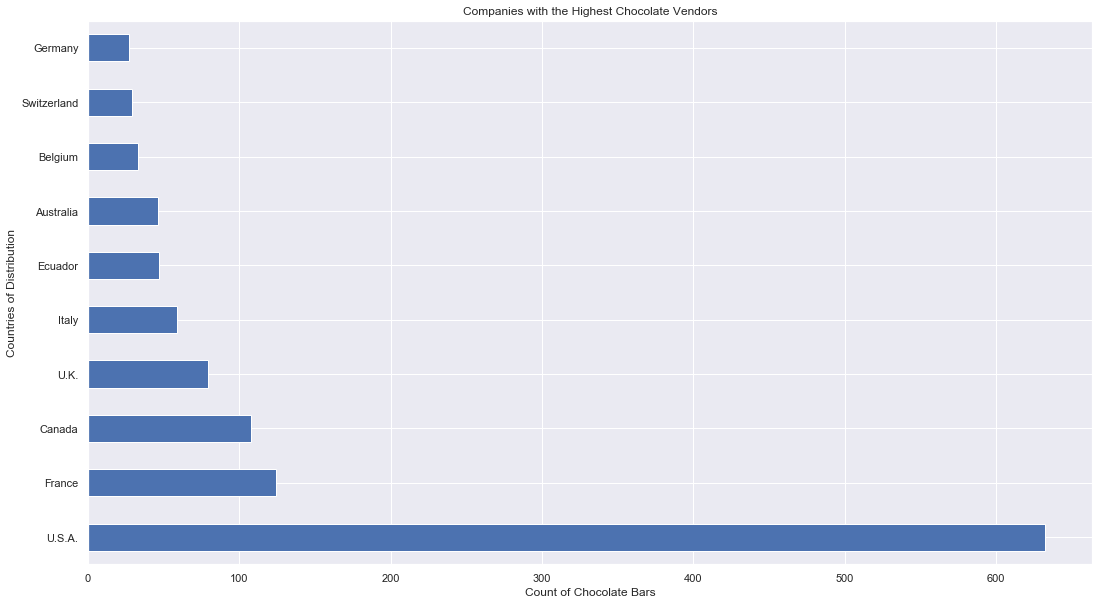

In [19]:

plt.rcParams['figure.figsize'] = (18,10)
# Create count bar plot of comapny location
df['Company_Location'].value_counts().head(10).plot('barh') #displaying top 10 company locations
# Set the Xlabel on graph
plt.xlabel('Count of Chocolate Bars')
# Set the Ylabel on graph
plt.ylabel('Countries of Distribution')
# Set the title on graph
plt.title("Companies with the Highest Chocolate Vendors")

In [21]:
rating = {'Rating':['size','mean','std']}
df.groupby('Company_Location').agg(rating)

Rating                    
                    size      mean       std
Company_Location                            
Amsterdam              3  3.500000  0.250000
Argentina              7  3.464286  0.172516
Australia             46  3.347826  0.426479
Austria               22  3.227273  0.344248
Belgium               33  3.090909  0.865615
Bolivia                2  3.250000  0.707107
Brazil                14  3.375000  0.376599
Canada               108  3.328704  0.435901
Chile                  2  3.750000  0.000000
Colombia              22  3.159091  0.478996
Costa Rica             8  3.125000  0.377964
Czech Republic         1  2.750000       NaN
Denmark               14  3.303571  0.297078
Domincan Republic      5  3.200000  0.209165
Ecuador               47  2.984043  0.592994
Fiji                   3  3.250000  0.433013
France               124  3.252016  0.537701
Germany               27  3.212963  0.508125
Ghana                  1  2.750000       NaN
Grenada                3  2.833333  0.381881
Guatemala              9  3.361111  0.416667
Honduras               6  3.208333  0.292261
Hungary               19  3.223684  0.398737
Iceland                2  3.250000  0.353553
India                  1  2.500000       NaN
Ireland                2  3.000000  0.353553
Israel                 8  3.218750  0.471273
Italy                 59  3.313559  0.609892
Japan                 17  3.088235  0.352903
Lithuania              5  3.150000  0.575543
Madagascar            13  3.230769  0.461672
Martinique             1  2.750000       NaN
Mexico                 3  2.916667  0.144338
Netherlands            4  3.500000  0.000000
New Zealand           17  3.191176  0.370066
Nicaragua              5  3.000000  0.250000
Peru                  14  2.892857  0.560857
Philippines            1  3.500000       NaN
Poland                 6  3.291667  0.430600
Portugal               2  2.875000  0.176777
Puerto Rico            3  2.583333  0.144338
Russia                 1  3.250000       NaN
Sao Tome               1  1.000000       NaN
Scotland               8  3.375000  0.500000
Singapore              1  3.500000       NaN
South Africa           3  2.666667  0.288675
South Korea            5  3.200000  0.273861
Spain                 20  3.250000  0.472953
St. Lucia              2  3.000000  0.353553
Suriname               1  3.250000       NaN
Sweden                 5  3.050000  0.273861
Switzerland           29  3.284483  0.471150
U.K.                  79  3.110759  0.474927
U.S.A.               632  3.141218  0.450759
Venezuela             16  3.156250  0.464354
Vietnam                7  3.500000  0.144338
Wales                  1  2.750000       NaN

In [25]:
df.Rating.value_counts()

3.50    320
3.00    285
3.25    251
2.75    210
3.75    181
2.50    115
4.00     82
2.00     28
2.25     12
1.50      9
1.00      4
5.00      2
1.75      1
Name: Rating, dtype: int64

In [26]:
#company makers along with rating
df[['Company_Makers','Rating']].groupby('Company_Makers').mean()[:10]

,Rating
Company_Makers,
A. Morin,3.355263
AMMA,3.500000
Acalli,3.750000
Adi,3.250000
Aequare (Gianduja),2.875000
Ah Cacao,3.000000
Akesson's (Pralus),2.750000
Alain Ducasse,2.666667
Alexandre,3.500000


Text(0.5, 1.0, 'Number of Users that Rated Chocolate Bars')

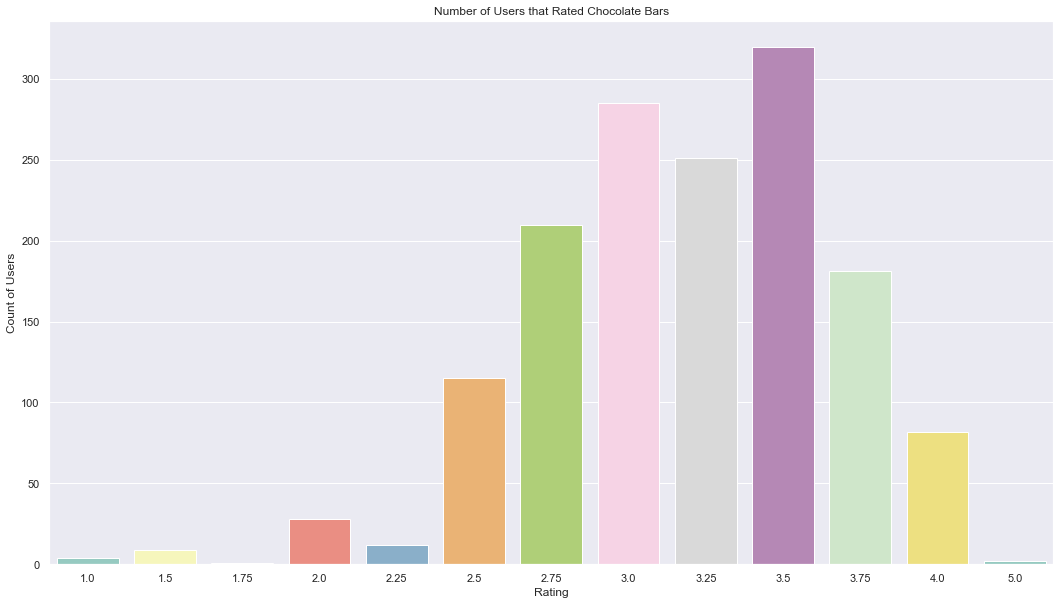

In [34]:
#Count of Choclate Bar Ratings
sns.countplot(x='Rating',data=df, palette = 'Set3')
plt.xlabel('Rating')
plt.ylabel('Count of Users')
plt.title('Number of Users that Rated Chocolate Bars')

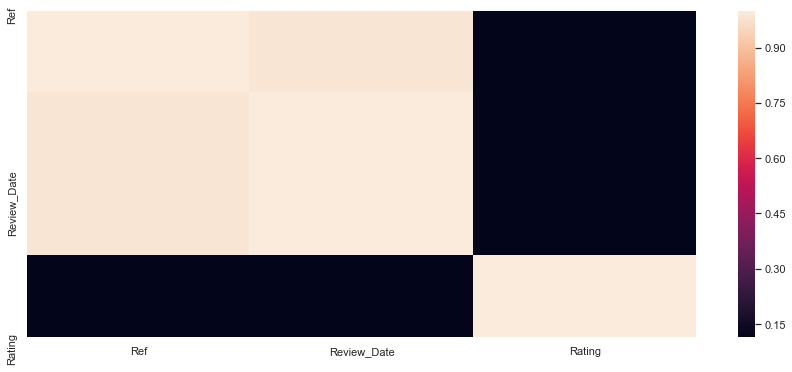

In [39]:
#checking corelation
sns.heatmap(df.corr()) 

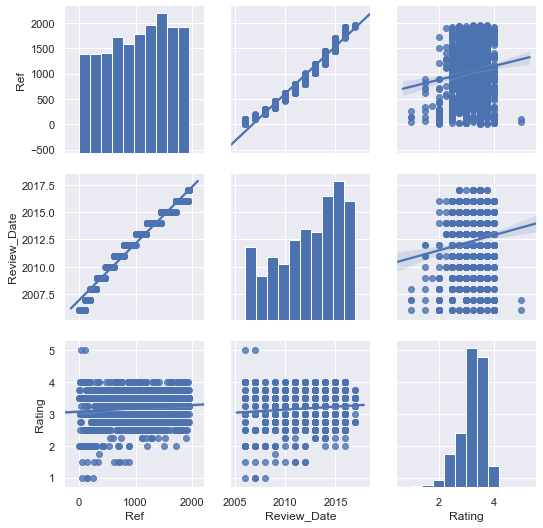

In [41]:
sns.pairplot(df, kind="reg")
plt.show()

In [43]:
df['Rating']=np.ceil(df.Rating).astype(int) 

In [46]:
df['Rating']

0       4
1       4
2       4
3       4
4       4
       ..
1495    4
1496    4
1497    4
1498    4
1499    3
Name: Rating, Length: 1500, dtype: int32

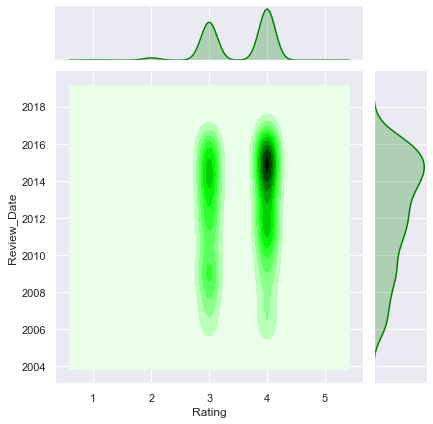

In [48]:
sns.jointplot(x = 'Rating', y= 'Review_Date', data = df, kind='kde', color = 'green')

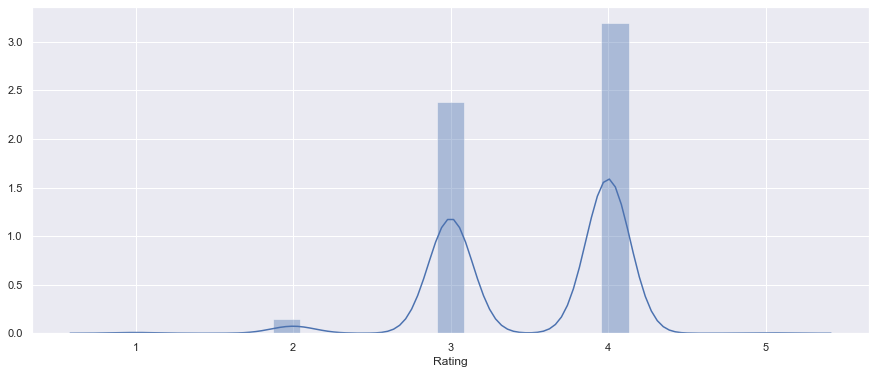

In [49]:
sns.distplot(df['Rating'])

In [50]:
#Data set informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Company_Makers                      1500 non-null object
Specific_bean_Origin_or_Bar_Name    1500 non-null object
Ref                                 1500 non-null int64
Review_Date                         1500 non-null int64
Cocoa_Percent                       1500 non-null object
Company_Location                    1500 non-null object
Rating                              1500 non-null int32
Bean_Type                           1500 non-null object
Broad_Bean_Origin                   1500 non-null object
dtypes: int32(1), int64(2), object(6)
memory usage: 99.7+ KB


In [74]:
df['Cocoa_Percent'].str.replace('%','').astype(float)

0       64.0
1       80.0
2       70.0
3       70.0
4       65.0
        ... 
1495    70.0
1496    58.0
1497    64.0
1498    72.0
1499    70.0
Name: Cocoa_Percent, Length: 1500, dtype: float64

In [108]:
cat_cols=['Company_Makers','Specific_bean_Origin_or_Bar_Name','Cocoa_Percent','Company_Location','Bean_Type','Broad_Bean_Origin'] 

In [109]:
#one-hot encoding
dummies=pd.get_dummies(df,columns = cat_cols) 
dummies.columns#checking the resulted column

Index(['Ref', 'Review_Date', 'Rating', 'Company_Makers_A. Morin',
       'Company_Makers_AMMA', 'Company_Makers_Acalli', 'Company_Makers_Adi',
       'Company_Makers_Aequare (Gianduja)', 'Company_Makers_Ah Cacao',
       'Company_Makers_Akesson's (Pralus)',
       ...
       'Broad_Bean_Origin_Ven.,Ecu.,Peru,Nic.',
       'Broad_Bean_Origin_Venez,Africa,Brasil,Peru,Mex',
       'Broad_Bean_Origin_Venezuela', 'Broad_Bean_Origin_Venezuela, Dom. Rep.',
       'Broad_Bean_Origin_Venezuela, Ghana',
       'Broad_Bean_Origin_Venezuela, Java',
       'Broad_Bean_Origin_Venezuela, Trinidad', 'Broad_Bean_Origin_Vietnam',
       'Broad_Bean_Origin_West Africa', 'Broad_Bean_Origin_ '],
      dtype='object', length=1519)

In [110]:
#Feature Vairables and Target Variable
X = dummies.drop('Rating',axis=1)                                                  
y = dummies['Rating'] 

In [111]:
y #Rating values (Target Variable)

0       4
1       4
2       4
3       4
4       4
       ..
1495    4
1496    4
1497    4
1498    4
1499    3
Name: Rating, Length: 1500, dtype: int32

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [127]:
model = []
algorithm=[]

<b>Random Forest </b> 

In [128]:
rfc = RandomForestClassifier(random_state = 0,
                                  n_estimators = 50,
                                  max_depth = 55, 
                                  min_samples_split = 10,  min_samples_leaf = 2)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
algorithm.append("Random Forest")
accuracy_trn = accuracy_score(y_train, rfc.predict(X_train))#calculating train accuracy
print("Training Accuracy: %.2f%%" % (accuracy_trn * 100.0))
from sklearn.metrics import accuracy_score
accuracy_RandomForest = accuracy_score(y_test, rfc_pred)#calculating test accuracy
print("Test Accuracy: %.2f%%" % (accuracy_RandomForest * 100.0))
print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_pred))
print("Classification Report")
print(classification_report(y_test, rfc_pred))
print("Cross Validation Scores")
rfc_score = cross_val_score(rfc, X,y, cv=5) 
print(rfc_score)
model.append(rfc_score)
print('\n')
print("Mean Cross Validation Score: ", rfc_score.mean())

Training Accuracy: 73.08%
Test Accuracy: 67.33%
Confusion Matrix
[[  0   0   2   0   0]
 [  0   0   6   1   0]
 [  0   0  46  77   0]
 [  0   0  11 156   0]
 [  0   0   0   1   0]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.71      0.37      0.49       123
           4       0.66      0.93      0.78       167
           5       0.00      0.00      0.00         1

    accuracy                           0.67       300
   macro avg       0.27      0.26      0.25       300
weighted avg       0.66      0.67      0.63       300

Cross Validation Scores
[0.60333333 0.58666667 0.61666667 0.59333333 0.58333333]


Mean Cross Validation Score:  0.5966666666666667


<b>KNN with 5 values (5 Models) N= 5,6,7,8,9,10</b>

In [129]:
knbr= range(1,11)
knn_cv_score= []
for k in knbr:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn_score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')# CV with five fold
    knn_cv_score.append(knn_score.mean())
ideal_knn= knbr[np.argmax(knn_cv_score)]
#print(ideal_knn)
algorithm.append("KNN")
kValues = [5, 6, 7, 8, 9, 10]
for eachK in kValues:
    knn= KNeighborsClassifier(n_neighbors=eachK)
    knn_trained2= knn.fit(X_train, y_train)
    y_predict= knn_trained2.predict(X_test)
    # Training
    knn.fit(X_train, y_train)
    # Testing
    print('-'*20)
    print('N =', eachK)
    eachPred = eachModel.predict(X_test)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test, eachPred))
    accuracy_knn = accuracy_score(y_train, eachModel.predict(X_train))#calculating train accuracy
    print("Training Accuracy: %.2f%%" % (accuracy_knn * 100.0))
    accuracy2 = accuracy_score(y_test, eachPred)#calculating test accuracy
    print("Test Accuracy: %.2f%%" % (accuracy2 * 100.0))
    print("Classification Report")
    print(classification_report(y_test, y_predict))
    print('-'*20)
    print("Cross Validation Scores")
    knn_score = cross_val_score(knn, X,y, cv=5) 
    print(knn_score)
    model.append(knn_score)
    print('\n')
    print("Mean Cross Validation Score: ", knn_score.mean())

--------------------
N = 5
Confusion matrix: 
[[  0   0   1   1   0]
 [  0   0   3   4   0]
 [  0   0  75  48   0]
 [  0   0  59 108   0]
 [  0   0   1   0   0]]
Training Accuracy: 64.92%
Test Accuracy: 61.00%
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.17      0.14      0.15         7
           3       0.58      0.50      0.54       123
           4       0.67      0.75      0.71       167
           5       0.00      0.00      0.00         1

    accuracy                           0.63       300
   macro avg       0.28      0.28      0.28       300
weighted avg       0.61      0.63      0.62       300

--------------------
Cross Validation Scores
[0.6        0.59333333 0.57666667 0.52       0.60333333]


Mean Cross Validation Score:  0.5786666666666667
--------------------
N = 6
Confusion matrix: 
[[  0   0   1   1   0]
 [  0   0   3   4   0]
 [  0   0  75  48   0]
 [  0   0  

<b>Logistic Regression</b>

In [130]:
lr = LogisticRegression(random_state = 0)

# fitting the training data to model
lr.fit(X_train, y_train)
algorithm.append("Logistic Regression")

#Making Predictions
lr_predict = lr.predict(X_test)

accuracy = accuracy_score(y_test, lr_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_train, lr.predict(X_train))
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))

logreg_cv_score = cross_val_score(lr, X, y, cv=5) 

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, lr_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, lr_predict))
print('\n')

print("Cross Validation Scores")
lr_score = cross_val_score(lr, X,y, cv=5) 
print(lr_score)
model.append(lr_score)
print('\n')
print("Mean Cross Validation Score: ", lr_score.mean())

Test Accuracy: 61.00%
Training Accuracy: 60.67%
=== Confusion Matrix ===
[[  0   0   2   0   0]
 [  0   0   6   1   0]
 [  0   0  43  80   0]
 [  0   0  27 140   0]
 [  0   0   0   1   0]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.55      0.35      0.43       123
           4       0.63      0.84      0.72       167
           5       0.00      0.00      0.00         1

    accuracy                           0.61       300
   macro avg       0.24      0.24      0.23       300
weighted avg       0.58      0.61      0.58       300



Cross Validation Scores
[0.57666667 0.6        0.61       0.58333333 0.57333333]


Mean Cross Validation Score:  0.5886666666666667


In [140]:
algo = { 'model': ['RandomForest', 'KNN Classifier', 'Logistic Regression'], 'Validation Scores': [rfc_score.mean(),knn_score.mean() , lr_score.mean()] }
gp = pd.DataFrame (algo, columns = ['model', 'Validation Scores'])


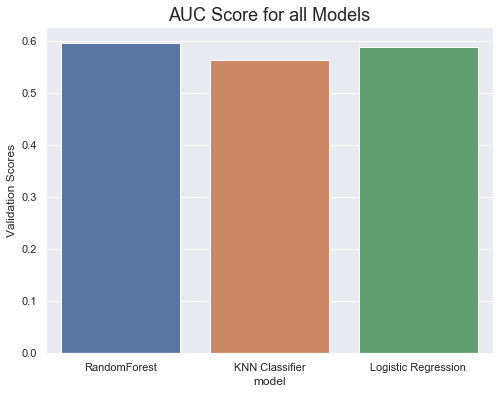

In [144]:
plt.figure(figsize = (8,6))
plt.title('AUC Score for all Models',fontsize=18)
s = sns.barplot(x='model',y='Validation Scores',data=gp)

plt.show()